# OVERVIEW

The Environmental Insights Explorer team at Google is keen to gather insights on ways to improve calculations of global emissions factors of sub-national regions.The ultimate goal of this challenge is to test if calculations of emission factor using remote sensing technique are possible.

# Remote Sensing
  
 Remote sensing is the acquistion of information about an object or phenomenon without making physical contact with the object and thus in contrast to on site observation,especially the earth. Remote sensing is used in numerous fields, including geography,land surveying and most Earth Sciene disciplines; it also has military,intelligence,commercial,economic,planning, and humanitarian applications.

# Remote Sensing Techniques
 
Remote sensing utilizes satellite and/or  airborne based sensors to collect information about a given object or area. Remote sensing data collection methods can be passive or active.Passive sensors(e.g., spetral imagers) detect natural radition that is emitted or reflected by the object or area being observed. In active remote sensing energy is emitted and resultant signal that is reflected back is measured.
![](http://th.bing.com/th/id/OIP.cr73jDfOvCNKcH3-1jcSXgHaFj?w=223&h=180&c=7&o=5&dpr=2.5&pid=1.7)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018101000.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018081406.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019011700.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018111900.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019011212.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018101306.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019050812.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018082412.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019031818.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018121412.tif
/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2018071318.tif
/kaggl

# Earth science data & analysis

The following datasets have been provided as a starter kit to get started with the competition.

1.**Sentinel-5P Carbon Monoxide**
Concentrations of Carbon monoxide(CO) and water vapor. CO is an important atmospheric trace gas for our understanding of tropospheric chemistry. Main sources of CO are combustion of fossil fuels,biomass burning, and atmospheric oxidation of methane and other hydrocarbons.

Sentinel-5 Percursor is statelite launched on 13 october by the European Space Agency to monitor air pollution.The onboard sensor is frequently referred to as Tropomi.

2**Sentinel-5P Nitrogen Dioxide**
Troposheric and Stratospheric nitrogen dioxide concentration. Nitrogen dioxide enters the atmosphere as a result of anthropogenic activities such as fossil fuel combustion and biomass burning as well as natural processes including microbiological processes in soils,wildfires and lighting.

Sentinel-5 Precursor is a satellite launched on 13 october 2017 by the European Space Ageny to monitor air pollution.The onboard sensor is frequently referred to as Tropomi.


**Importing  necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801'
import folium 
from folium import plugins
import plotly.express as px
import rasterio as rio
import warnings
warnings.filterwarnings('ignore')

# Global Power Plant Database (GPPD)

The Global Power Plant Database is a comprehensive, open source database of power plants around the world.It centralizes power plant data to make it easier to navigate,compare and draw insights. Each power plant is geolocated and entries contain information on plant capcity, generation,ownership and fueltype. 

In [3]:
power_plant=pd.read_csv('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')
display(power_plant.shape)
display(power_plant.columns)
display(power_plant['system:index'].is_unique)
display(power_plant.head())

(35, 24)

Index(['system:index', 'capacity_mw', 'commissioning_year', 'country',
       'country_long', 'estimated_generation_gwh', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'geolocation_source', 'gppd_idnr', 'name',
       'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'primary_fuel',
       'source', 'url', 'wepp_id', 'year_of_capacity_data', '.geo'],
      dtype='object')

True

,system:index,capacity_mw,commissioning_year,country,country_long,estimated_generation_gwh,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,other_fuel1,other_fuel2,other_fuel3,owner,primary_fuel,source,url,wepp_id,year_of_capacity_data,.geo
0,0000000000000000315a,15.0,1942.0,USA,United States of America,685.397712,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Hydro,CEPR,http://energia.pr.gov/datos/plantas/,30936.0,0,"{""type"":""Point"",""coordinates"":[-66.66629863706..."
1,000000000000000026e5,1492.0,1975.0,USA,United States of America,8334.010812,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/aguirre.asp,30928.0,0,"{""type"":""Point"",""coordinates"":[-66.23079607357..."
2,00000000000000002fda,990.0,1962.0,USA,United States of America,5529.940150,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/costasur.asp,30934.0,0,"{""type"":""Point"",""coordinates"":[-66.75340271704..."
3,00000000000000003f76,602.0,1960.0,USA,United States of America,3362.650475,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Oil,PREPA,http://www.prepa.com/PALOSECO.ASP,30942.0,0,"{""type"":""Point"",""coordinates"":[-66.14859700475..."
4,00000000000000002def,10.0,1915.0,USA,United States of America,456.931808,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,PREPA,Hydro,PREPA,http://www.prepa.com/historia_eng.asp https:/...,65289.0,0,"{""type"":""Point"",""coordinates"":[-66.10600367149..."


In [4]:
power_plant.set_index('system:index',inplace=True)
power_plant.head().T

system:index,0000000000000000315a,000000000000000026e5,00000000000000002fda,00000000000000003f76,00000000000000002def
capacity_mw,15,1492,990,602,10
commissioning_year,1942,1975,1962,1960,1915
country,USA,USA,USA,USA,USA
country_long,United States of America,United States of America,United States of America,United States of America,United States of America
estimated_generation_gwh,685.398,8334.01,5529.94,3362.65,456.932
generation_gwh_2013,0,0,0,0,0
generation_gwh_2014,0,0,0,0,0
generation_gwh_2015,0,0,0,0,0
generation_gwh_2016,0,0,0,0,0
generation_gwh_2017,0,0,0,0,0


Let's understand some of the attributes :
* **capcity_mw**- electrical generating capcity in megawatts
* **commissioning year** - year of plant operation 
* **country_long**- full name of country
* **estimated_generation_gwh** - estimated annual electricity generation in gigawatt-hours
* **generation_gwh_2013**- generation of electricity in gigawatt-hours for the year2013
* **geolocation_source** - Dataset provider
* **gppd_idnr**- It is id of Global Power Plant Database under department of lllinois Natural Resourcessource
* **name**- name or title of powerplant
* **primary_fuel**-energy source used in primary eletricity generation 
* **weep_id**- a reference to a unique plant identifier in the widely used PLATTS-WEPP database
* **year_of_capcity_data**-year the capcity information was reported
* **source**- entity reporting the data
* **owner**- majority shareholder of the powerplant


In [5]:
display("Database Country")
display(power_plant['country'].value_counts())
display("ID of Global Power Plant Database")
display(power_plant['gppd_idnr'].value_counts())
display("Stockholder of power plant")
display(power_plant['owner'].value_counts())
display("Source to generated electricity")
display(power_plant['source'].value_counts())
display("Types of primary fuel  used :")
display(power_plant['primary_fuel'].value_counts())

'Database Country'

USA    35
Name: country, dtype: int64

'ID of Global Power Plant Database'

WRI1028010    1
WRI1026826    1
WRI1026821    1
WRI1028016    1
WRI1026820    1
WRI1028015    1
WRI1026808    1
WRI1026814    1
WRI1028007    1
WRI1026815    1
WRI1026825    1
WRI1026819    1
WRI1026818    1
WRI1028012    1
WRI1026816    1
WRI1026807    1
WRI1026809    1
WRI1028014    1
WRI1028009    1
WRI1028013    1
WRI1026827    1
WRI1028011    1
WRI1026811    1
WRI1026823    1
WRI1026810    1
WRI1028008    1
WRI1028017    1
WRI1026813    1
WRI1028006    1
WRI1026831    1
WRI1026828    1
WRI1026829    1
WRI1026817    1
WRI1026824    1
WRI1026812    1
Name: gppd_idnr, dtype: int64

'Stockholder of power plant'

PREPA                                      13
Sonnedix                                    2
AES Corporation                             2
Pattern Energy                              1
Sovereign Bank                              1
Windmar Renewable Energy                    1
Uriel Renewables and Coqui Power            1
Gas Natural Fenosa  International Power     1
Name: owner, dtype: int64

'Source to generated electricity'

CEPR                        14
PREPA                        9
PREPA; CEPR                  3
Sonnedix                     2
Pattern Energy               1
Gestamp Wind                 1
Clean Technica               1
Fluor; PREPA                 1
PV Tech                      1
Windmar Renewable Energy     1
TSK                          1
Name: source, dtype: int64

'Types of primary fuel  used :'

Hydro    11
Gas       9
Solar     6
Oil       6
Wind      2
Coal      1
Name: primary_fuel, dtype: int64

In [6]:
power_plant['name'].value_counts()

Aguirre                   2
Costa Sur                 2
Palo Seco                 2
Yauco 1                   1
San Fermin Solar Farm     1
Loiza Solar Park          1
Carite 1                  1
Yabucoa                   1
AES Ilumina               1
Vega Baja                 1
EcoEléctrica              1
A.E.S. Corp.              1
Garzas 2                  1
Yauco 2                   1
Salinas                   1
Punta Lima                1
Toro Negro 1              1
Dos Bocas                 1
Daguao                    1
Cambalache                1
Mayagüez                  1
Windmar Ponce             1
Vieques EPP               1
Toro Negro 2              1
San Juan CC               1
Caonillas 2               1
Santa Isabel Wind Farm    1
Río Blanco                1
Oriana Solar Farm         1
Caonillas 1               1
Jobos                     1
Garzas 1                  1
Name: name, dtype: int64

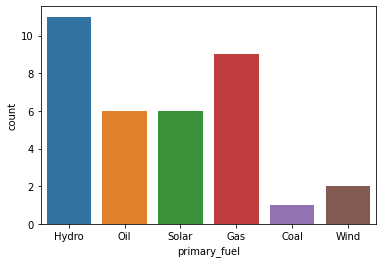

In [7]:
#plot primary fuel used
sns.countplot(power_plant['primary_fuel'])

In [8]:
#Year of establishment of plant
power_plant['commissioning_year'].value_counts()

0.0       21
2012.0     2
1941.0     2
2015.0     1
2011.0     1
2009.0     1
1937.0     1
1929.0     1
1915.0     1
1960.0     1
1962.0     1
1975.0     1
1942.0     1
Name: commissioning_year, dtype: int64

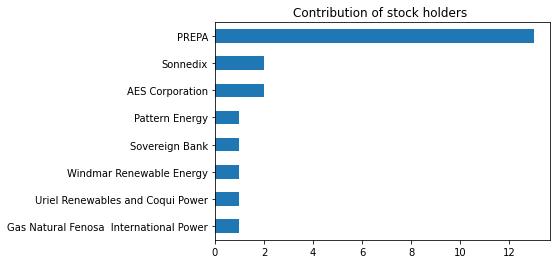

In [9]:
#contribution of Stock Holder
power_plant['owner'].value_counts(ascending=True).plot(kind='barh',title='Contribution of stock holders ')

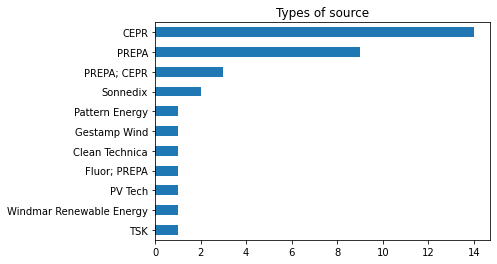

In [10]:
#types of source
power_plant['source'].value_counts(ascending=True).plot(kind='barh',title='Types of source')

In [11]:
temp=power_plant.groupby('commissioning_year')['estimated_generation_gwh','capacity_mw'].sum().reset_index()
temp=temp[temp['commissioning_year']==max(temp['commissioning_year'])].reset_index(drop=True)
tm=temp.melt(id_vars="commissioning_year",value_vars=["estimated_generation_gwh","capacity_mw"])
temp.head()
fig=px.treemap(tm,path=["variable"],values="value",height=225,width=1200,color_discrete_sequence=[act,rec])
fig.data[0].textinfo='label+text+value'
fig.show()

In [12]:
#Estimated generation growth from commissioning year
temp=power_plant.groupby('commissioning_year')['estimated_generation_gwh','capacity_mw'].sum().reset_index()
temp=temp.melt(id_vars="commissioning_year",value_vars=["estimated_generation_gwh","capacity_mw"],var_name='Year',value_name='Count')
temp.head()
fig=px.area(temp,x='commissioning_year',y='Count',color='Year',height=600,title='Production  over time',color_discrete_sequence=[rec,dth])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [13]:
full_grouped=power_plant.groupby(['source','primary_fuel',])['capacity_mw','estimated_generation_gwh'].sum().reset_index()


In [14]:
temp_1=full_grouped.sort_values(by='estimated_generation_gwh',ascending=False)
temp_1=temp_1.reset_index(drop=True)
temp_1.style.background_gradient(cmap='Blues')

,source,primary_fuel,capacity_mw,estimated_generation_gwh
0,Fluor; PREPA,Coal,454.299988,450562.692350
1,PREPA,Oil,4195.500000,23435.216060
2,CEPR,Gas,1105.000000,7785.243454
3,CEPR,Hydro,61.600000,2814.699937
4,PREPA,Hydro,32.640000,1491.425421
5,PREPA; CEPR,Hydro,14.160000,647.015440
6,CEPR,Oil,6.000000,33.514789
7,Sonnedix,Solar,73.150002,32.619609
8,Pattern Energy,Wind,101.199997,17.953645
9,TSK,Solar,27.000000,12.040047


In [15]:
#total electricity generation in gigwatthour for one year
total_gen=power_plant['estimated_generation_gwh'].sum()
print('Total Generation :'+'{:.3f}'.format(total_gen)+'GW')

Total Generation :486860.875GW


In [16]:
# percentage of total generation in gigawatthour
generation = (power_plant.groupby(['primary_fuel'])['estimated_generation_gwh'].sum()).to_frame()
generation = generation.sort_values('estimated_generation_gwh',ascending=False)
generation['percentage_of_total'] = (generation['estimated_generation_gwh']/total_gen)*100
generation

,estimated_generation_gwh,percentage_of_total
primary_fuel,,
Coal,450562.692350,92.544444
Oil,23468.730848,4.820418
Gas,7785.243454,1.599069
Hydro,4953.140798,1.017363
Solar,68.962714,0.014165
Wind,22.104981,0.004540


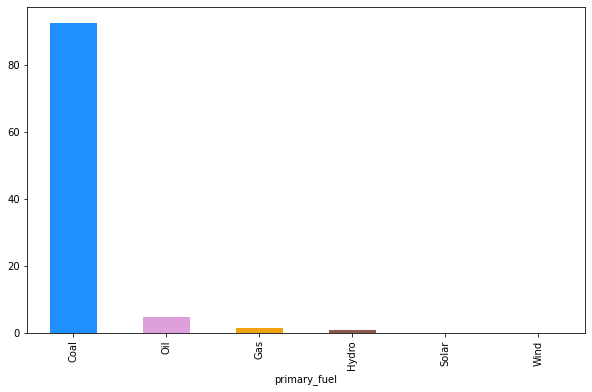

In [17]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 
generation['percentage_of_total'].plot(kind='bar',color=colors)

In [18]:

generation = (power_plant.groupby(['source'])['estimated_generation_gwh'].sum()).to_frame()
generation = generation.sort_values('estimated_generation_gwh',ascending=False)
generation['percentage_of_total'] = (generation['estimated_generation_gwh']/total_gen)*100
generation

,estimated_generation_gwh,percentage_of_total
source,,
Fluor; PREPA,450562.692350,92.544444
PREPA,24926.641481,5.119870
CEPR,10633.458179,2.184086
PREPA; CEPR,647.015440,0.132895
Sonnedix,32.619609,0.006700
Pattern Energy,17.953645,0.003688
TSK,12.040047,0.002473
Clean Technica,11.594119,0.002381
PV Tech,10.702264,0.002198


In [19]:
#total production capcity 
total_cap=power_plant['capacity_mw'].sum()
print('Total Capcity :'+'{:.3f}'.format(total_cap)+'MW')

Total Capcity :6148.450MW


In [20]:
capcity = (power_plant.groupby(['primary_fuel'])['capacity_mw'].sum()).to_frame()
capcity = capcity.sort_values('capacity_mw',ascending=False)
capcity['percentage_of_total'] = (capcity['capacity_mw']/total_cap)*100
capcity

,capacity_mw,percentage_of_total
primary_fuel,,
Oil,4201.500000,68.334296
Gas,1105.000000,17.972009
Coal,454.299988,7.388854
Solar,154.650002,2.515268
Wind,124.599997,2.026527
Hydro,108.400000,1.763046


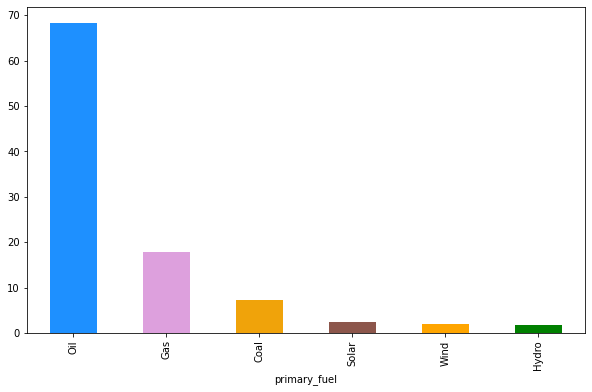

In [21]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 
capcity['percentage_of_total'].plot(kind='bar',color=colors)

In [22]:
capcity = (power_plant.groupby(['source'])['capacity_mw'].sum()).to_frame()
capcity = capcity.sort_values('capacity_mw',ascending=False)
capcity['percentage_of_total'] = (capcity['capacity_mw']/total_cap)*100
capcity

,capacity_mw,percentage_of_total
source,,
PREPA,4228.140000,68.767576
CEPR,1172.600000,19.071473
Fluor; PREPA,454.299988,7.388854
Pattern Energy,101.199997,1.645943
Sonnedix,73.150002,1.189731
TSK,27.000000,0.439135
Clean Technica,26.000000,0.422871
PV Tech,24.000000,0.390342
Gestamp Wind,23.400000,0.380584


# Second Part


In [23]:
def plot_points_on_map(dataframe,begin_index,end_index,latitude_column,latitude_value,longitude_column,longitude_value,zoom):
    df = dataframe[begin_index:end_index]
    location = [latitude_value,longitude_value]
    plot = folium.Map(location=location,zoom_start=zoom)
    for i in range(0,len(df)):
        popup = folium.Popup(str(df.primary_fuel[i:i+1]))
        folium.Marker([df[latitude_column].iloc[i],df[longitude_column].iloc[i]],popup=popup).add_to(plot)
    return(plot)

def overlay_image_on_puerto_rico(file_name,band_layer):
    band = rio.open(file_name).read(band_layer)
    m = folium.Map([lat, lon], zoom_start=8)
    folium.raster_layers.ImageOverlay(
        image=band,
        bounds = [[18.6,-67.3,],[17.9,-65.2]],
        colormap=lambda x: (1, 0, 0, x),
    ).add_to(m)
    return m

def plot_scaled(file_name):
    vmin, vmax = np.nanpercentile(file_name, (5,95))  # 5-95% stretch
    img_plt = plt.imshow(file_name, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

def split_column_into_new_columns(dataframe,column_to_split,new_column_one,begin_column_one,end_column_one):
    for i in range(0, len(dataframe)):
        dataframe.loc[i, new_column_one] = dataframe.loc[i, column_to_split][begin_column_one:end_column_one]
    return dataframe


In [24]:
power_plant = pd.read_csv('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')
power_plant = split_column_into_new_columns(power_plant,'.geo','latitude',50,66)
power_plant = split_column_into_new_columns(power_plant,'.geo','longitude',31,48)
power_plant['latitude'] = power_plant['latitude'].astype(float)
a = np.array(power_plant['latitude'].values.tolist()) # 18 instead of 8
power_plant['latitude'] = np.where(a < 10, a+10, a).tolist() 
lat=18.200178; lon=-66.664513
plot_points_on_map(power_plant,0,425,'latitude',lat,'longitude',lon,9)

# Explore the weather data

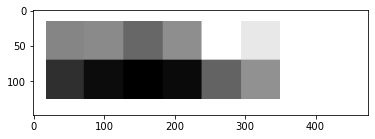

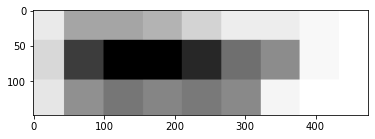

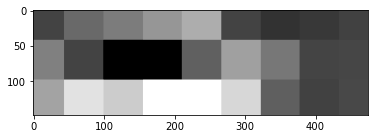

In [25]:
image='/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gldas/gldas_20181210_0600.tif'
image_band=rio.open(image).read(1)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=1)
image='/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019051106.tif'
image_band=rio.open(image).read(1)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=1)
image='/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gfs/gfs_2019031218.tif'
image_band=rio.open(image).read(1)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=1)

# Check the Automated land use classification

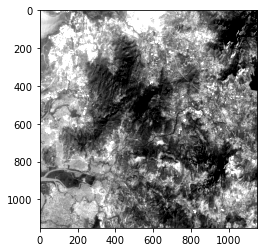

In [26]:
# checck random image:
image='../input/inputravi/l3-ne43h01-094-059-01feb2013-band2.tif'
image_band=rio.open(image).read(1)
plot_scaled(image_band)
overlay_image_on_puerto_rico(image,band_layer=1)

# Connect to the Google Earth Engine API

In [27]:
from kaggle_secrets import UserSecretsClient
from google.oauth2.credentials import Credentials
import ee
import folium

def add_ee_layer(self, ee_image_object, vis_params, name):
  # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

def plot_ee_data_on_map(dataset,column,begin_date,end_date,minimum_value,maximum_value,latitude,longitude,zoom):
    # https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb
    folium.Map.add_ee_layer = add_ee_layer
    vis_params = {
      'min': minimum_value,
      'max': maximum_value,
      'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
    my_map = folium.Map(location=[latitude,longitude], zoom_start=zoom, height=500)
    s5p = ee.ImageCollection(dataset).filterDate(
        begin_date, end_date)
    my_map.add_ee_layer(s5p.first().select(column), vis_params, 'Color')
    my_map.add_child(folium.LayerControl())
    display(my_map)


After registering at [https://earthengine.google.com/signup/,](http://earthengine.google.com/signup/,) navigate to the add on menu of the notebook editor and create a new user secret called "earth_engine" that contains the refresh token from ee.Authenticate().This step only need to run once. YOu can generate the refresh_token by running the following line in a new code cell:ee.Authenticate().Next, follow the instructions ,paste the value into the input box, run the following command in  new code cell:**!cat ~/.config/earthengine/credentials**.This should return to you a refresh token that can then be saved as your Kagggle user secret.

In summary:

* Step 0: Register your account using both of the following two links:[Links#1](https://earthengine.google.com/signup/) ,[Link#2](https://docs.google.com/forms/d/e/1FAIpQLScFk_pkrrDDF4O8imsEBMaryLDU-Ghf44eHbgujIAl_SXJTJQ/viewform)    
* Step 1: Open an internet-enabled notebbok and then retrieve your token by opening the ee.Authenticate() link in a new tab.You will also ned to copy/paste that value into the relavant input box.
* Step2: After completing Step1,retrieve your refresh-token by running **!cat ~/.config/earthengine/credentials**
* step3: Save your refresh-token as kaggle user secret
* Step 4: Run the code snippet that contains ee.Initialize()


Steps #0,#1,#2, and #3 only need to be perfoemed once(for the initial setup).


Step #4 is run every time that you run your code. Hopefully that helps!